In [1]:
%matplotlib inline
import os  # interact with the filesystem
import urllib.request  # grad data from internet
import zipfile

import numpy as np
import numpy.ma as ma
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# download and unzip a file
def download_zip(url, zip_fname, base_path, rm_zip=False):
    zip_file = os.path.join(base_path, zip_fname)
    u = urllib.request.urlopen(url)
    data = u.read()
    u.close()
    
    # write tar data to file
    with open(zip_file, "wb") as f:
        f.write(data)

    # extract the data
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(base_path)

    if rm_zip:
        os.remove(zip_file)

In [3]:
# get the atlasVolume atlas
data_dir = os.path.join(os.getcwd(), "data")
url = "http://download.alleninstitute.org/informatics-archive/current-release/mouse_annotation/E18pt5_atlasVolume.zip"
download_zip(url, "E18pt5_atlasVolume.zip", data_dir, rm_zip=True)

In [4]:
# show what's there
os.listdir("data/atlasVolume")

['atlasVolume.mhd', 'atlasVolume.raw']

In [5]:
# load the file into numpy
hdr_file = os.path.join(data_dir, "atlasVolume", "atlasVolume.mhd")
img = io.imread(hdr_file, plugin='simpleitk')

In [6]:
# check the shape
img.shape

(278, 370, 581)

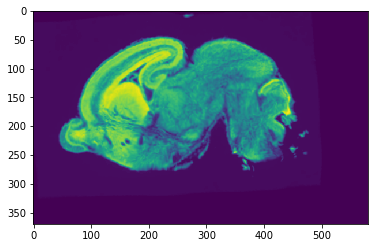

In [7]:
# show a saggital slice of the image
plt.imshow(img[92,:,:])

In [8]:
# unit is microns
voxel_dimensions_mi = (16.0, 16.0, 20.0)
# unit is mm
voxel_dimensions_mm = tuple([x / 1000 for x in voxel_dimensions_mi])
# volume for a single voxel in mm
voxel_volume = voxel_dimensions_mm[0] * voxel_dimensions_mm[1] * voxel_dimensions_mm[2]
voxel_volume

5.12e-06

In [9]:
hist, bins = np.histogram(img, bins=np.unique(img))

(array([0., 4., 6., 6., 2., 1., 2., 1., 2., 0., 1., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

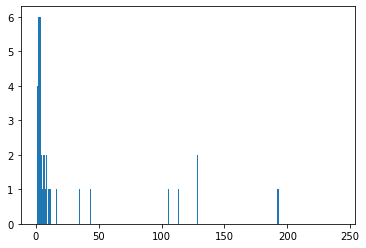

In [10]:
plt.hist(hist, bins=bins)

In [11]:
mask_img = ma.masked_array(img, mask=img > 10, fill_value=0)

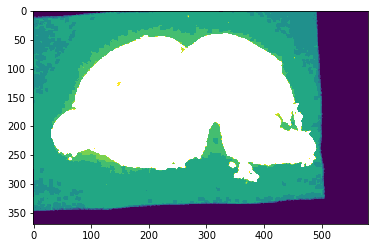

In [12]:
plt.imshow(mask_img[100,:,:])

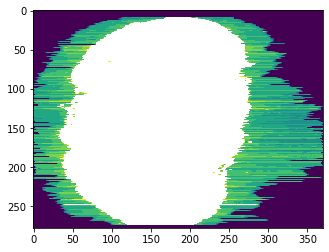

In [13]:
plt.imshow(mask_img[:,:,250])

In [14]:
mask = ma.getmask(mask_img)

In [15]:
brain_voxels = np.count_nonzero(mask)

In [16]:
brain_volume = brain_voxels * voxel_volume
brain_volume

75.95731968